# Problem 1 : Relationship between Advertising Methods and Sales

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_csv('Data_Advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

The columns consists of floating datatype. It is safe to say that all columns given are actually numerical variables.

Lets now do EDA on the dataset. We first check is there any null values in the dateset.

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Since there are no null values, we can now proceed to do EDA on all the variables.

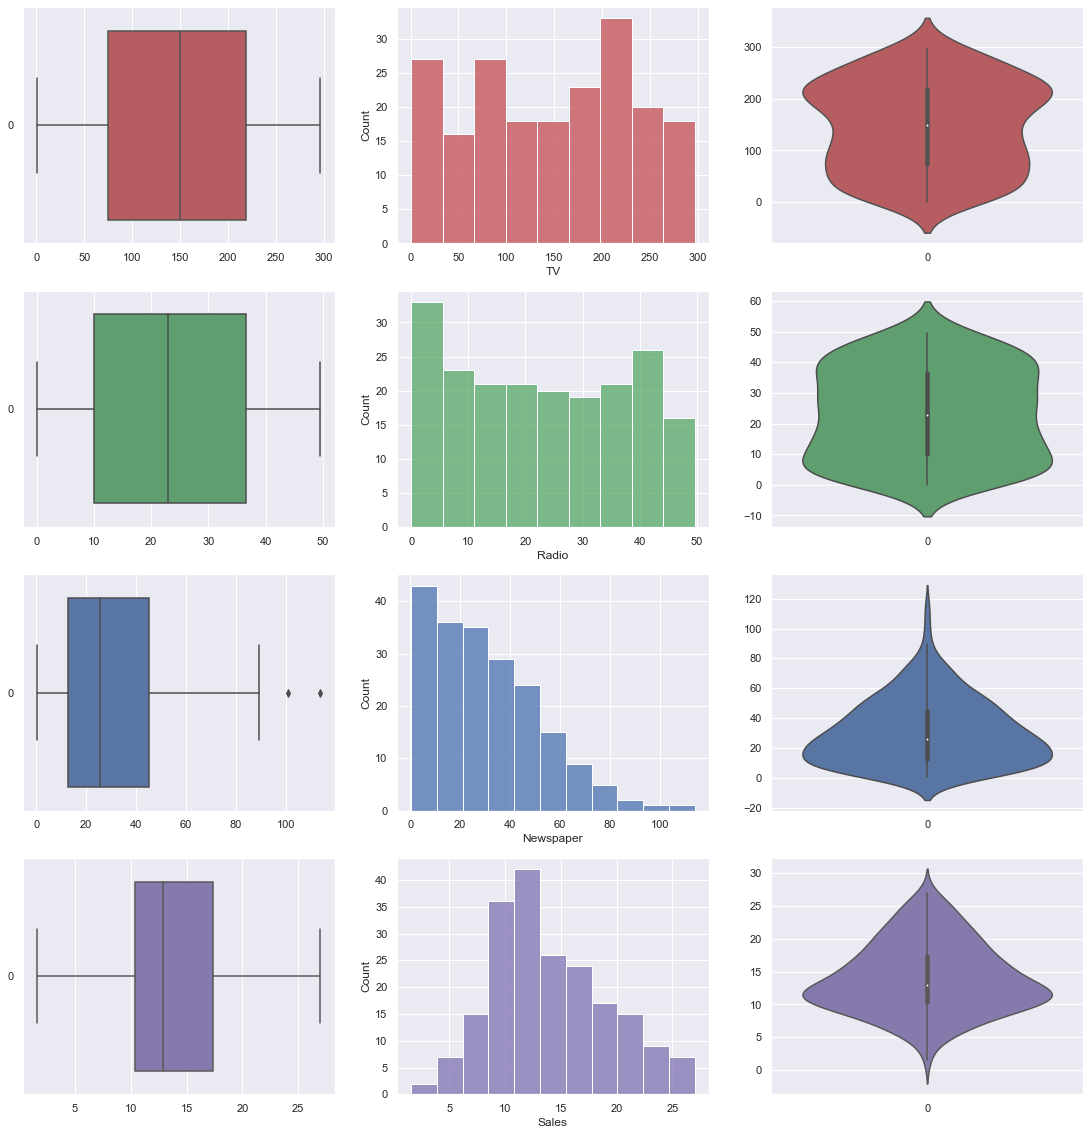

In [6]:
# Plot the distributions of all variables
f,axes = plt.subplots(4,3,figsize = (19,20))
colors = ['r','g','b','m']

count = 0 
for var in data:
    sb.boxplot(data = data[var],orient = 'h', color = colors[count],ax = axes[count,0])
    sb.histplot(data = data[var], color = colors[count],ax = axes[count,1])
    sb.violinplot(data = data[var], color = colors[count],ax = axes[count,2])
    count +=1

From the figures above, we note that the distribution for  **Radio**,**TV** and **Sales** are fair enough. Whereas for **Newspaper**, the data is positively skewed and there are outliers in the data. 

It is also interesting to note that despit the amount spended on all advertising method, the amount of sales for the store is quite low. This might because of the units not specified for each columns.

We will take note of that and proceed on.

### Checking Relationships Among the Variables

We see which variables having a strong relastionship to Salesprice.

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<AxesSubplot:>

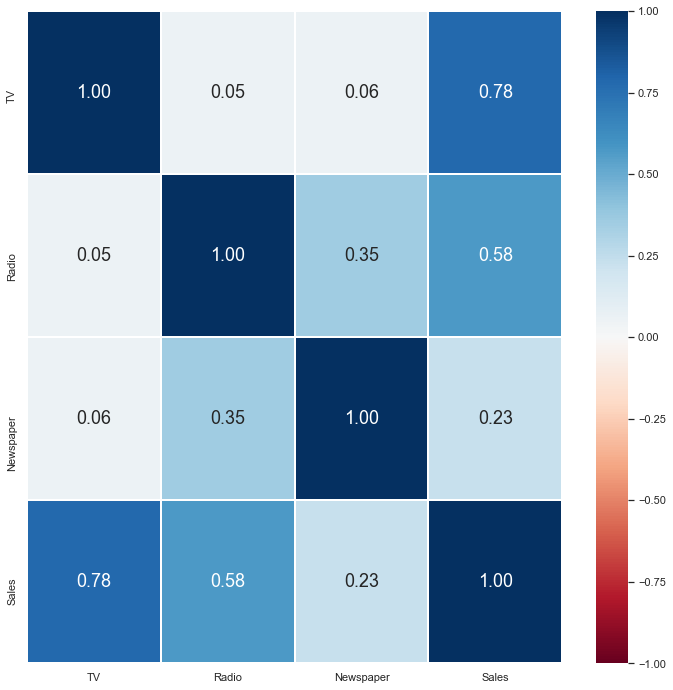

In [7]:
# Plotting a correlation matrix
print(data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

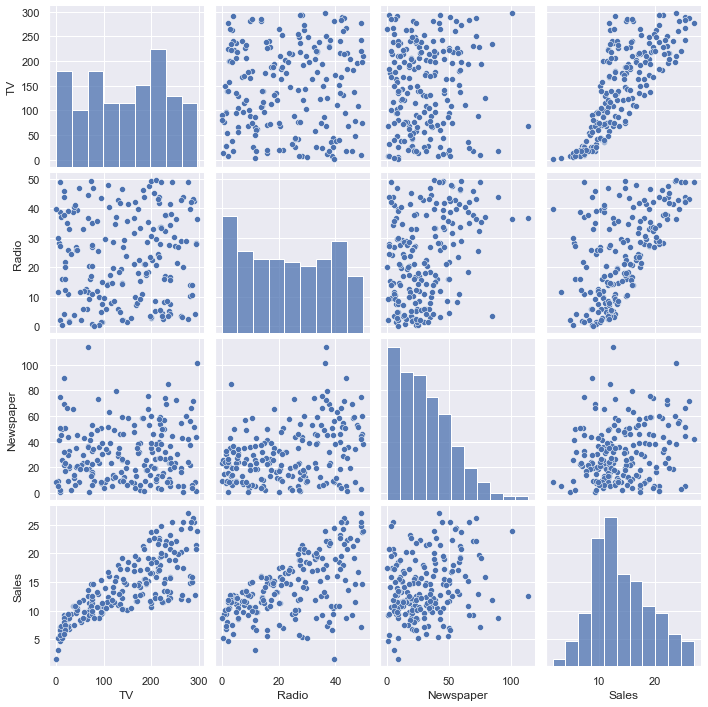

In [8]:
# Draw pairs of variables against one another
sb.pairplot(data = data)

Indeed, according to the heatmap correlation, we rank the strong linear relationship of the variables with Sales as follows :

    1. TV (0.78)
    2. Radio (0.58)
    3. Newspaper (0.23)
    
It is also worth noting that the pairplot between TV and Sales indeed shows a very strong linear relationship, followed by Radio, then Newspaper.

We can conclude that the advertising method **TV** is the best advertising method for the stores. Future effort may be made to focus more on advertising through TV.

# Problem 2 : Predicting Sales Given Advertising Budget

Before we fit the data into a linear regression model, we check whether the data contains any outliers. As recall from the boxplot above, only the variable **Newspaper** have outliers.

In [9]:
for x in ['Newspaper']:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    
    max = q75+ (1.5 *intr_qr)
    min = q25 - (1.5 *intr_qr)
    
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
    

In [10]:
newdata = data.dropna()

In [11]:
newdata.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


Let's check the skewness of all the given variables as well.

In [12]:
#Checking the skewness of the data
newdata.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

In [13]:
var = pd.DataFrame(newdata[['TV','Radio','Newspaper']])
sp =  pd.DataFrame(newdata['Sales'])

In [14]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(var, sp, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (148, 1) (148, 3)
Test Set  : (50, 1) (50, 3)


In [15]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [2.60555171]
Coefficients of Regression 	: a =  [[ 0.0474888   0.18918559 -0.00089982]]



,Predictors,Coefficients
0,TV,0.047489
1,Radio,0.189186
2,Newspaper,-0.000900


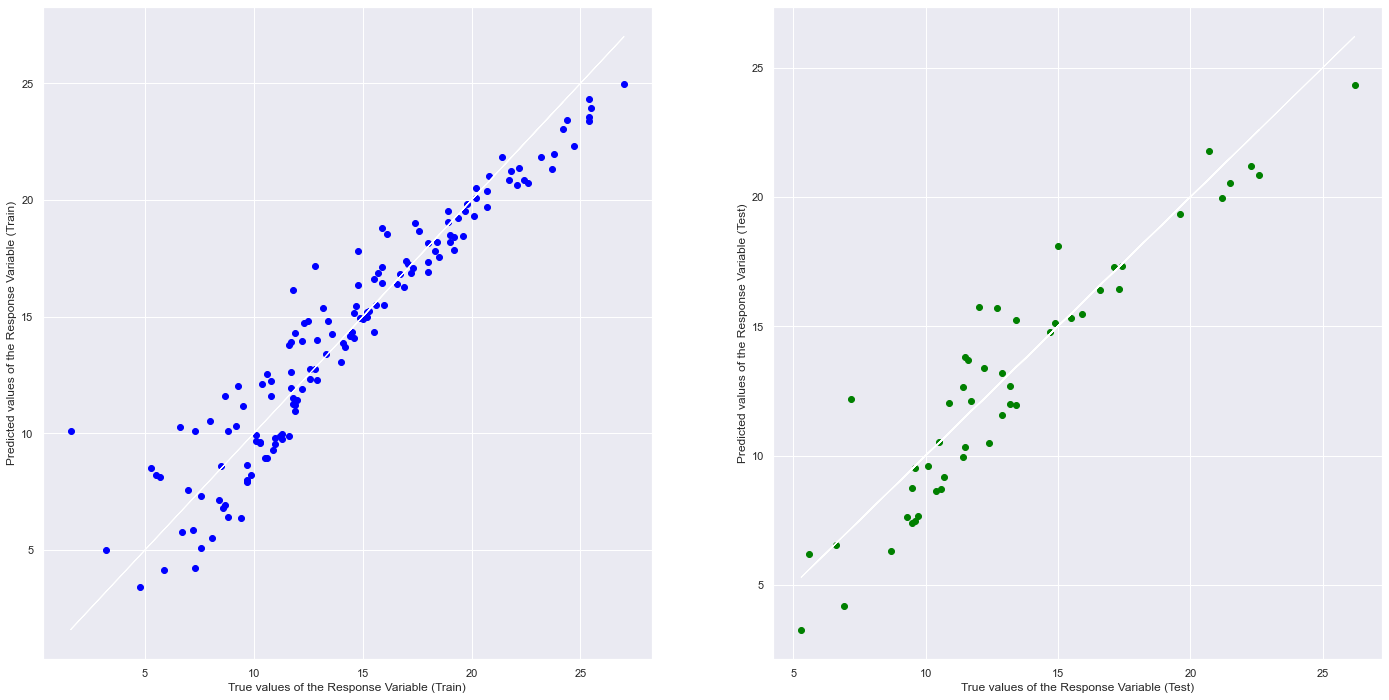

In [16]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [17]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9007226151774825
Mean Squared Error (MSE) 	: 2.8269532652739082

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8641994689293284
Mean Squared Error (MSE) 	: 2.8690545607173332



The value of the R^2 that we obtain for both train and test data are very good with a value of **0.89** and **0.90** respectively. We can conclude that the model is actually great in predicting sales with all the given variables.

## 2a) Which variable will be of most important in predicting sales?

In [18]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': linreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

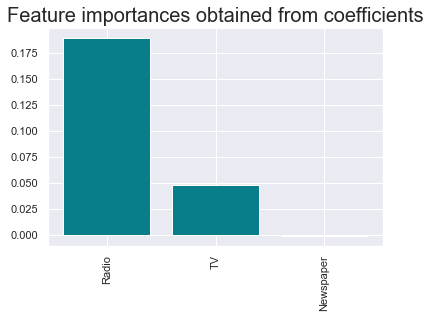

In [19]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Since linear regression is just an eqation with coefficients assigned to each input variable, intuitively, the one with the highest coefficients will be of most important in predicting sales.

We can apply this technique, as the question did not mention about the scale or unit of the variables.

We conclude that, the importances of variables for this linear regression model are ranked as follows:
 
 1. Radio(coeff = 0.1926)
 2. TV(coeff = 0.0437)
 3. Newspaper (coeff = 0.009, too small to be consider important)

# 2b) Which variables are in linear relationship and which are not?

In [20]:
newdata.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

We see that the skewness of the variable "newspaper" is positively skewed. Now, we try to transform it in order to reduce it skewness to an acceptable margin.

### We use **square root transformation** for positively skewed variables.

In [21]:
newspaper = pd.DataFrame(newdata['Newspaper'])
rest = pd.DataFrame(newdata[['TV','Radio']])

In [22]:
tnews = np.sqrt(newspaper)
tnews.skew()

Newspaper   -0.040649
dtype: float64

Now all variables are in acceptable skewness. Lets fit everything into a regression model.

In [23]:
jointDF = pd.concat([rest, tnews], axis = 1).reindex(rest.index)
jointDF

,TV,Radio,Newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [24]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(jointDF, sp, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (148, 1) (148, 3)
Test Set  : (50, 1) (50, 3)


In [25]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [3.11046669]
Coefficients of Regression 	: a =  [[ 0.04611219  0.18362632 -0.02112345]]



,Predictors,Coefficients
0,TV,0.046112
1,Radio,0.183626
2,Newspaper,-0.021123


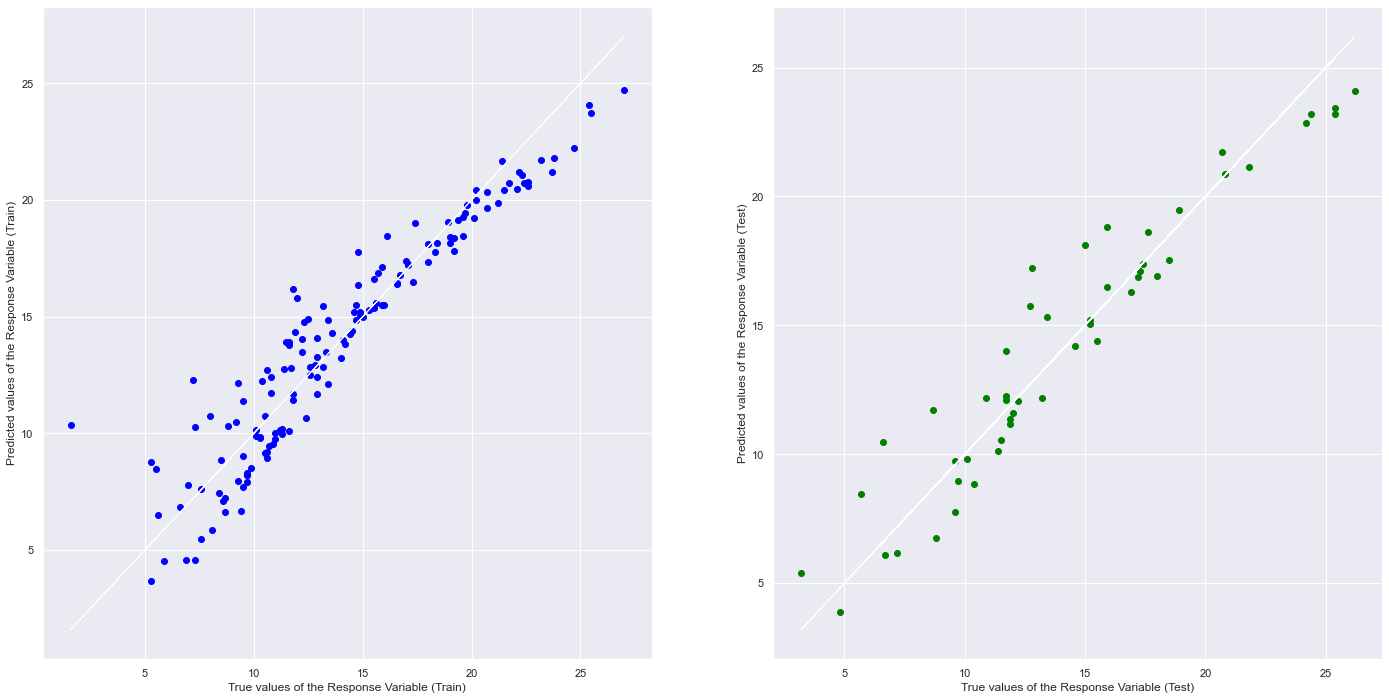

In [26]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [27]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.888507061619676
Mean Squared Error (MSE) 	: 2.857679402621284

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9109209193417809
Mean Squared Error (MSE) 	: 2.7138793518537545



The dataset after transformation actually have almost similar explained variance values! The MSE values for both test and train data will decrease as now one of the input is scaled by squareroot. 

We can conclude that after transformation, the model indeed improve its accuracy as the value of MSE indeed decrease!

The equation now becomes:

Sales = a * TV + b * sqrt(Newspaper) + c * Radio,
where a b and c are constant.

Thus, we conclude that **TV** and **Radio** are linear variables with sales, whereas **Newspaper** is **non-linear** to sales in our model.

## 2c) How accurate does model predict sales? 

We do Cross Validation with linear regression.

First of all, our model gives a pretty decent R^2 value for the given datasets. We can say the model is extremely great, but it may not be the case. It may also due to the fact that the model is overfitting the data. 

In this section, we do cross validation to check the accuracy of our model.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])

In [29]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, var, sp,
                              cv=5,
                              scoring='neg_mean_squared_error')

print("MSE scores:\n", scores)

MSE scores:
 [3.11836378 2.43182094 1.60865688 5.54178104 2.85699428]


In [30]:
print("Average MSE score (across experiments):")
print(scores.mean())

Average MSE score (across experiments):
3.1115233825654585


In [31]:
# Multiply by -1 since sklearn calculates *negative* MAE
sc = -1 * cross_val_score(my_pipeline, var, sp,
                              cv=5,
                              scoring='explained_variance')

print("R2:\n", sc)

R2:
 [-0.88197996 -0.92415583 -0.93074874 -0.81957918 -0.89661842]


In [32]:
print("Average R2 (across experiments):")
print(sc.mean())

Average R2 (across experiments):
-0.8906164297903032


Lets compare to the MSE values that we got from our model before doing cross validation.

After applying cross validation, we see that the MSE of our model actually did not differ much. The same goes for the value of Explained Variance which is almost the same.

Since the cross validation MSE and R2 are almost similar to MSE and R2 value from our model test score, we can conclude that, our model is indeed **accurate** in predicting Sales.

# Problem 3

We will be using the model with the transformation dataset which gives the better accuracy.

We use the equation :

Sales = 0.046112* TV + -0.021123 * sqrt(Newspaper) +  0.183626 Radio

Now if we are given 200 of credit to divide among the three variables:

Ideally, since **Radio** have the highest coefficient in the linear regression model, we would say that throw all 200 unit into Radio will maximise the sales of the store.

But in this case, I will allocate the unit into those with positive coefficients (not newspaper since no one wants a negative in their sales).

I would allocate my 200 as follows:

**TV = (0.046112/(0.046112 + 0.183626) ) * 200 = 40.14
  Radio = (0.183626/(0.046112+0.183626)) * 200 = 159.86**
  
This way, the allocation would be more distributed according to their importances instead of go all in on one variable.